# Clustering for Customer Segmentation with KMeans


## Key Takeaways
In this lab, you will gain a comprehensive understanding of KMeans clustering and its applications in data segmentation. 

_You will learn how to:_
- choose the optimal number of clusters, 
- visualize cluster results, and 
- apply clustering techniques to real-world datasets. 

Through practical exercises and projects, you will develop the skills necessary to leverage clustering for data-driven decision-making in various domains.

## Applications in Market Segmentation

__How data science helps:__

- Businesses analyze customer data to create targeted marketing strategies that cater to specific groups (segments), improving engagement and loyalty.

__Types of customer segmentation features:__

- Demographic, Geographic, Psychographic, and Behavioural.

__Demographic__ - grouping is based on demographic variables such as age, gender, income, occupation, and education level. 

__Geographic__ - group according to their location, which could be as broad as a country or as specific as a neighborhood. This helps in tailoring marketing campaigns that are culturally and regionally relevant. 

__Psychographic__ - includes lifestyle, values, attitudes, and personal traits. 

__Behavioural__ - customers are divided based on their behaviour patterns related to the business, such as purchase history, product usage frequency, brand loyalty, and user status (new, potential, or loyal customers).

__What data do I regularly segment on for Email Marketing Segmentation?__ 

Recency Frequency Monetary (RFM) features, time on list, time since last purchase, spend in last 30 days, products purchased, interests (what they clicking on), events attended, email scoring, clicked on a product page (which ones?), geographic region, number of tags, number of events, and many more.

__Algorithms used:__

- KMeans - great tool for finding similar customers.


## Prepare Data

In [1]:
# Libraries

# Data manipulation
import pandas as pd
# from pandas_profiling import ProfileReport

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px

# Date manipulation
from datetime import date, datetime, timedelta

# Clustering algorithm
from sklearn.cluster import KMeans

# For Cat features
from category_encoders import OneHotEncoder

# For Scaling features
from sklearn.preprocessing import StandardScaler

# Model pipeline
from sklearn.pipeline import make_pipeline

# Reduce dimensionality
from sklearn.decomposition import PCA

# Handling missing values
from sklearn.impute import SimpleImputer

# Evaluation metric
from sklearn.metrics import silhouette_score

# Warning
import warnings
warnings.simplefilter('ignore', category=Warning, lineno=0, append=False)

### Import

Let's look at the first few rows of data.

In [2]:
# import data
raw_df = pd.read_csv('./data/marketing_campaign.csv')
raw_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Its always good to get little more information about the data like data types, missing values and others. Info function is very helpful for this.

In [3]:
# Understand data structure
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We see that majority of the features are integers and very few float and object type. It also shows that there is a column with missing values which is `Income`. There is a better way to understand exactly how many values are missing from this feature.

#### Missing Values

In [4]:
# Checking missing values
raw_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# Fill in missing values
raw_df.loc[
    raw_df['Income'].isnull()==True,# row location where value == True for NaN
    'Income' # col location
    ] = raw_df['Income'].mean()

In [6]:
# Instantiate the imputer
imp = SimpleImputer(strategy='mean')

# Fit & transform data
imputed_df = pd.DataFrame(imp.fit_transform(raw_df[['Income']]))

# Checking missing values again
imputed_df.isnull().sum()

0    0
dtype: int64

In [7]:
raw_df['Income'].mean()

52247.25135379061

In [8]:
# Checking missing values
raw_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Now, if you run the previous command again, there should be no missing values.

In [9]:
raw_df.Z_CostContact.unique()

array([3], dtype=int64)

Before moving any further, lets try to understand the what each feature means.
- **ID**: Identification of a customer,
- **Year_Birth**: Customer's year of birth,
- **Education**: Customer's education level,
- **Marital_Status**: Customer's marital status,  ('Single', 'Together', 'Married', 'Divorced', 'Widow', etc),
- **Income**: Amount of money in customer account,
- **Kidhome**: Number of kids at home,
- **Teenhome**: Number of teenagers at customer's home,
- **Dt_Customer**: Date when customer make last purchase,
- **Recency**: Number of days since customer's last purchase,
- **[MntWines, MntFruits , MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds]**: Amount of purchases by customer on each product,
- **[NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases]**: How frequently the purchases are being made, based on different ways to purchase products.
- **NumWebVisitsMonth**: How frequent customers visit the website 
- **[AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2]**: 
- **Complain**: Customer complaints (0 - no complaint, 1 - complaint)
- **Z_CostContact**: Customer contact
- **Z_Revenue**:
- **Response**:

### Explore

In [10]:
# Cast Dt_Customer to datetime format
pd.to_datetime(raw_df['Dt_Customer'], format="%d-%m-%Y")

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [11]:
# Cat features
cat_features = ['Education', 'Marital_Status']
for i in cat_features:
    print(f'Feature {i}:\n {raw_df[i].unique()}')
# raw_df

Feature Education:
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Feature Marital_Status:
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [12]:
raw_df.describe(include='number')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
raw_df.loc[:, raw_df.columns.str.contains('Mnt')].aggregate(
    'sum', axis=1
)

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Length: 2240, dtype: int64

In [14]:
(raw_df.
 assign(
     Dt_Customer = lambda x: pd.to_datetime(x['Dt_Customer'], format= "%d-%m-%Y")
     ).assign(
         Cust_Age = lambda x: (x['Dt_Customer'].min() - x['Dt_Customer'])#/timedelta(days=1))
     )
     ).assign(
            Spent = lambda x: x.loc[:,x.columns.str.contains('Mnt')].agg(
                ['sum'], #function to use
                axis=1 # tell pandas to aggregate each row
                )
            )

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cust_Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,-36 days,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,-586 days,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,-387 days,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,-560 days,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,-538 days,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,-318 days,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,-680 days,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,-544 days,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,-543 days,843


#### Create `prepare_data` function

In [15]:
def prepare_data(data):

    data = (
        data
        # Remove NA values
        .dropna()
        
        # Convert Dt_Customer datatype to Date
        .assign(
            Dt_Customer = lambda x: pd.to_datetime(x['Dt_Customer'], format="%d-%m-%Y")
            )
        
        # Feature: Customer Age - max customer date
        .assign(
            Cust_Age = lambda x: (x['Dt_Customer'].min() - x['Dt_Customer'])/timedelta(days=1)
            )
        
        # Spent = Sum(Mnt...)
        .assign(
            Spent = lambda x: x.loc[:,x.columns.str.contains('Mnt')].agg(
                ['sum'], #function to use
                axis=1 # tell pandas to aggregate each row
                )
            )
        
        # Remove unnecessary features
        .drop(
            columns = ['ID', 'Z_CostContact', 'Z_Revenue', 'Response', 'Dt_Customer']
            )
        )
    
    # Transform Cat features
    prepared_df = OneHotEncoder(use_cat_names=True).fit_transform(data)
    
    # Output: cleaned dataframe
    return prepared_df

In [16]:
prepared_data = prepare_data(raw_df)
prepared_data.head()

,Year_Birth,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Single,Marital_Status_Together,Marital_Status_Married,Marital_Status_Divorced,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Cust_Age,Spent
0,1957,1,0,0,0,0,1,0,0,0,...,4,7,0,0,0,0,0,0,-36.0,1617
1,1954,1,0,0,0,0,1,0,0,0,...,2,5,0,0,0,0,0,0,-586.0,27
2,1965,1,0,0,0,0,0,1,0,0,...,10,4,0,0,0,0,0,0,-387.0,776
3,1984,1,0,0,0,0,0,1,0,0,...,4,6,0,0,0,0,0,0,-560.0,53
4,1981,0,1,0,0,0,0,0,1,0,...,6,5,0,0,0,0,0,0,-538.0,422


### Split

In [17]:
# Features to use
X = prepare_data(raw_df)
X.head()

,Year_Birth,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Single,Marital_Status_Together,Marital_Status_Married,Marital_Status_Divorced,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Cust_Age,Spent
0,1957,1,0,0,0,0,1,0,0,0,...,4,7,0,0,0,0,0,0,-36.0,1617
1,1954,1,0,0,0,0,1,0,0,0,...,2,5,0,0,0,0,0,0,-586.0,27
2,1965,1,0,0,0,0,0,1,0,0,...,10,4,0,0,0,0,0,0,-387.0,776
3,1984,1,0,0,0,0,0,1,0,0,...,4,6,0,0,0,0,0,0,-560.0,53
4,1981,0,1,0,0,0,0,0,1,0,...,6,5,0,0,0,0,0,0,-538.0,422


## Build Model

In [18]:
# Building model
model = make_pipeline(
    StandardScaler(), # clustering using distances - scaling is recommended
    KMeans(n_clusters=5, random_state=42)
)

# Fit model - assign the label
X['Clusters'] = model.fit_predict(X)

In [19]:
X.head()

,Year_Birth,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Single,Marital_Status_Together,Marital_Status_Married,Marital_Status_Divorced,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Cust_Age,Spent,Clusters
0,1957,1,0,0,0,0,1,0,0,0,...,7,0,0,0,0,0,0,-36.0,1617,3
1,1954,1,0,0,0,0,1,0,0,0,...,5,0,0,0,0,0,0,-586.0,27,0
2,1965,1,0,0,0,0,0,1,0,0,...,4,0,0,0,0,0,0,-387.0,776,3
3,1984,1,0,0,0,0,0,1,0,0,...,6,0,0,0,0,0,0,-560.0,53,0
4,1981,0,1,0,0,0,0,0,1,0,...,5,0,0,0,0,0,0,-538.0,422,0


In [21]:
model.named_steps['kmeans'].inertia_

61422.50295938932

In [22]:
silhouette_score(X, model.named_steps['kmeans'].labels_)

0.016186377667740167

### Iterate: Optimizing the Number of Clusters

In [23]:
n_clusters = range(2,8)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build model
    model = make_pipeline(
        StandardScaler(), # clustering using distances - scaling is recommended
        KMeans(n_clusters=k, random_state=42)
    )
    # Train model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # Calculate silhouette score
    silhouette_scores.append(
        silhouette_score(
            X, 
            model.named_steps["kmeans"].labels_)
    )

print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [70829.98172334097, 66482.74537953355, 63691.80351702668]

Silhouette Scores: [0.48839056293269284, 0.28346665728087717, 0.1768284980374858]


In [24]:
import plotly.express as px
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=inertia_errors,
    title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Inertia")
fig.show()

In [25]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title="K-Means Model: Silhouette Score vs Number of Clusters (Elbow Method)"
)
fig.update_layout(
    xaxis_title="Number of Clusters", yaxis_title="Silhouette Score"
)
fig.show()

### Evaluate

In [26]:
# final_model labels
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3, random_state=42)
)
# Predict class labels
labels = final_model.fit_predict(X)
print(labels[:10])

[1 0 2 0 0 2 2 0 0 0]


In [27]:
X['labels'] = final_model.named_steps["kmeans"].labels_
print(labels[:10])

[1 0 2 0 0 2 2 0 0 0]


## Communicate

### 1. Using `plotnine` from `ggplot` library package coming from R language.

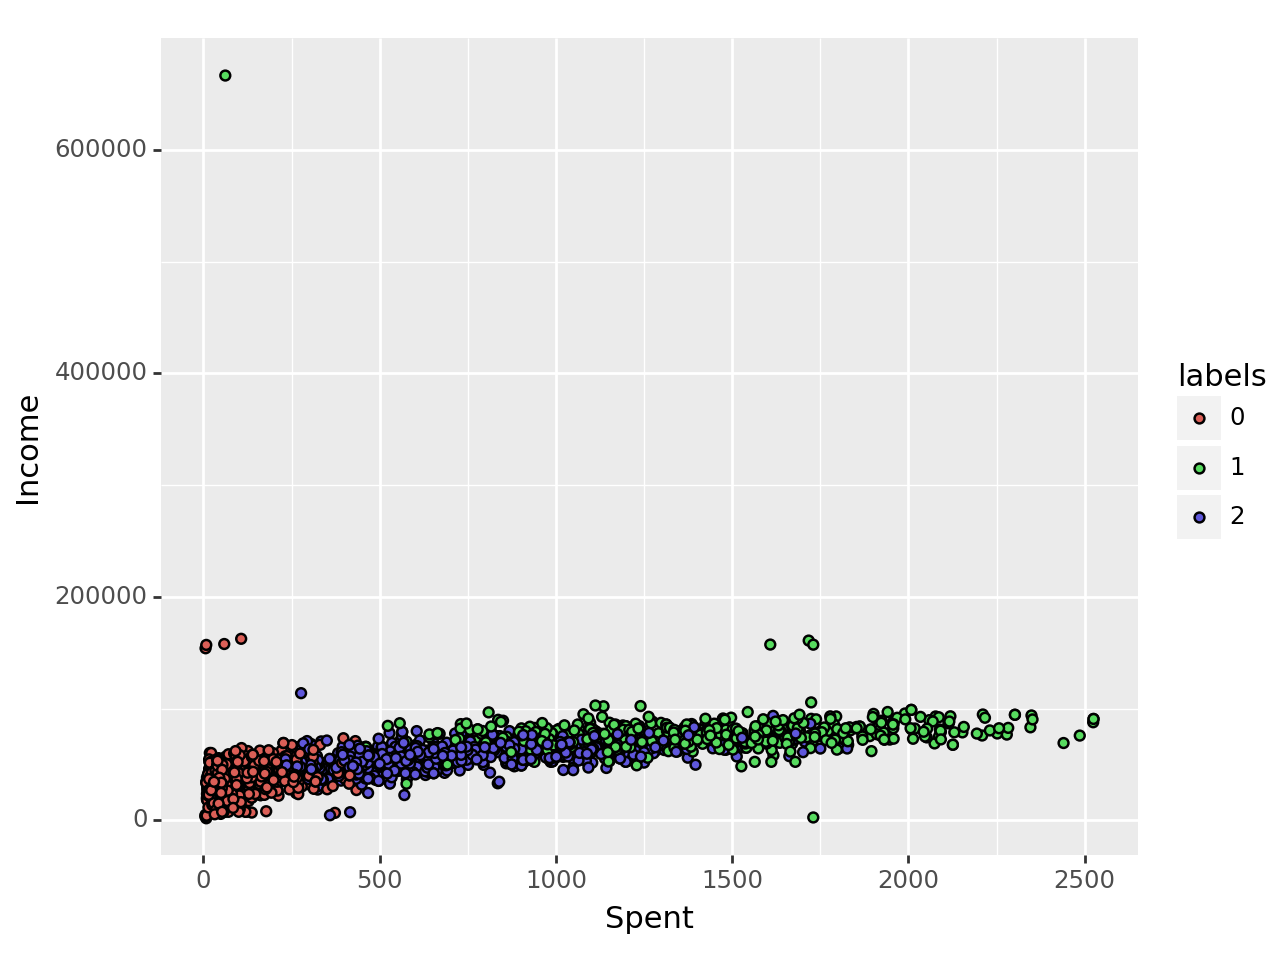

<Figure Size: (640 x 480)>

In [32]:
import plotnine as pn
from plotnine import *
p = (
    # Create a plot area
    ggplot(X, aes(x='Spent', y='Income')) +
    # Add points into the plot area
    geom_point(aes(fill = X['labels'].astype(str)))
    )
p

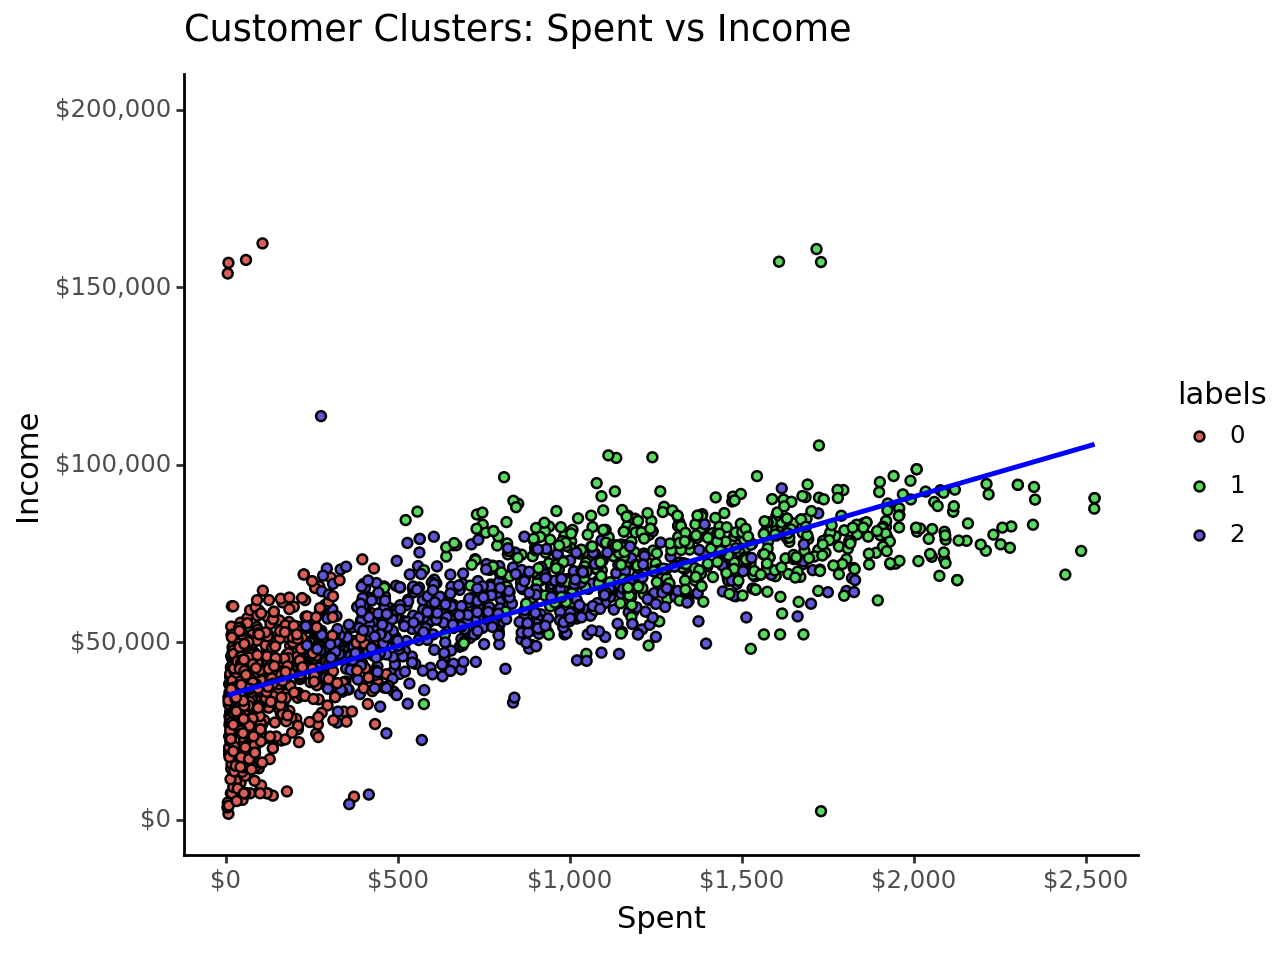

<Figure Size: (640 x 480)>

In [33]:
import plotnine as pn
from plotnine import *
p = (
    # Create a plot area
    ggplot(X, aes(x='Spent', y='Income')) +
    # Add points into the plot area
    geom_point(aes(fill = X['labels'].astype(str)))
    )
# Add a blue smooth line
p = p + geom_smooth(
    color = "blue",
    se = False
    )
# Format x-axis scale to display `$000,000`
p = p + scale_x_continuous(
    name='Spent',
    labels = lambda x: [f'${y:,.0f}' for y in x]
    )
# Format y-axis scale to display `$000,000`
p = p + scale_y_continuous(
    name='Income',
    labels = lambda x: [f'${x:,.0f}' for x in x],
    limits=(0,200_000)
    )
# Add title to the plot
p = p + labs(
    title = "Customer Clusters: Spent vs Income"
    ) + theme_classic() # Add plot theme

p#.show()

### 2. Visualization using (PCA)

In [34]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)
X_t
# # Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (2240, 2)


,PC1,PC2
0,5910.645039,-1034.367889
1,-5914.658001,582.992399
2,19365.950939,168.446585
3,-25608.762075,191.023307
4,6040.521555,358.505010


In [35]:
# Create scatter plot
fig = px.scatter(
    data_frame=X_pca,
    x="PC1",
    y="PC2",
    color=labels.astype(str),
    title="Customer Clusters: Spent vs Income"
)
fig.update_layout(xaxis_title="Spent", 
                  yaxis_title="Income")
fig.show()